In [19]:
import librosa.core as lc
import librosa.display as ld
import librosa.feature as lf
import librosa.onset as lco

blues0, sr = lc.load("../data/raw/blues/blues.00000.wav")
print(blues0)

[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847]


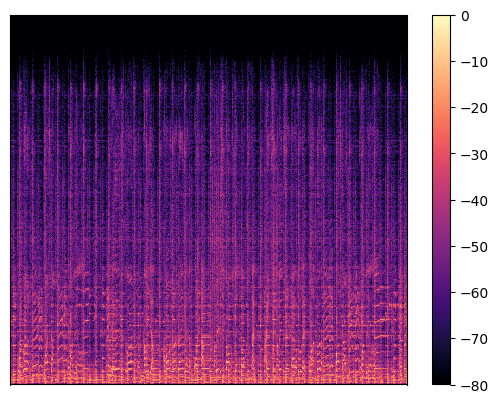

In [21]:
import matplotlib.pyplot as plt
import numpy as np

D = lc.stft(blues0)
S_db = lc.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure()
ld.specshow(S_db)
plt.colorbar()

In [23]:
onset_env = lco.onset_strength(y= blues0,sr = sr)
tempo = lf.tempo(onset_envelope=onset_env,sr = sr)
print(tempo)


[123.046875]


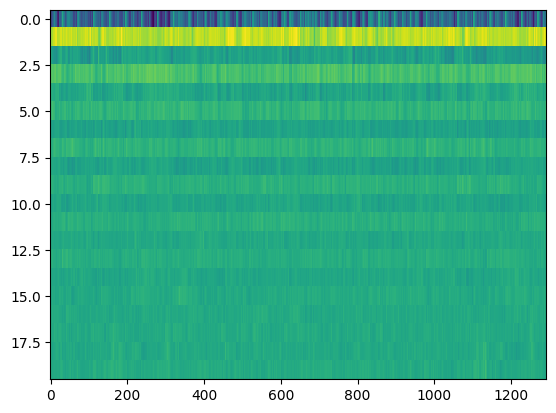

In [24]:
mfcc = np.array(lf.mfcc(y = blues0,sr = sr))
plt.imshow(mfcc, interpolation='nearest', aspect='auto')
plt.show()


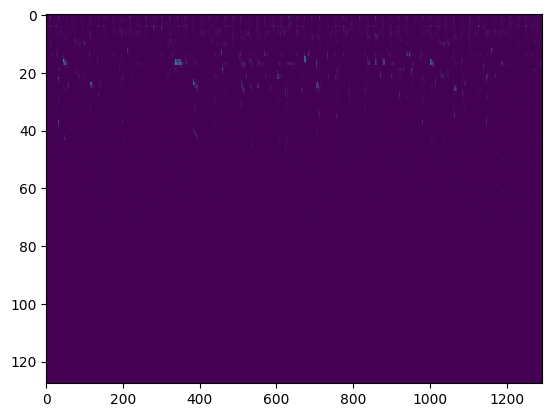

In [26]:
melspectrogram = np.array(lf.melspectrogram(y = blues0,sr = sr))
plt.imshow(melspectrogram, interpolation='nearest', aspect='auto')
plt.show()

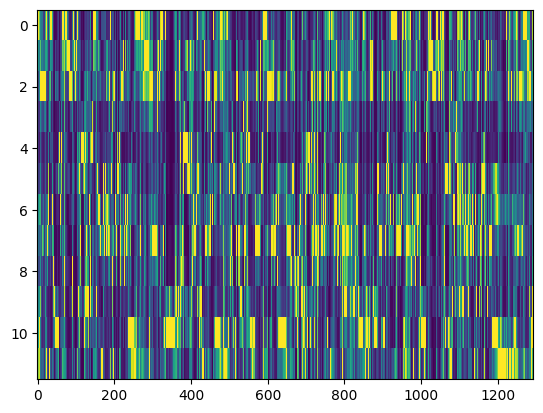

In [27]:
chroma = np.array(lf.chroma_stft(y = blues0,sr = sr))
plt.imshow(chroma, interpolation='nearest', aspect='auto')
plt.show()


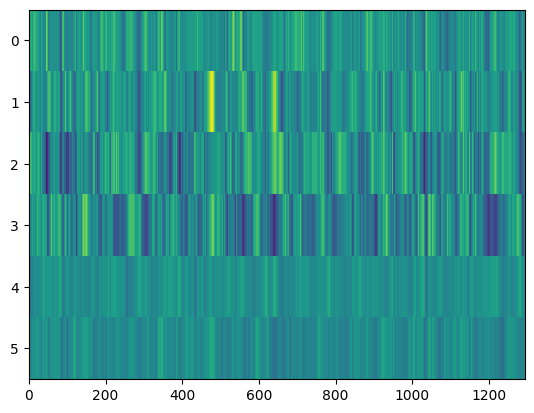

In [32]:
tntz = np.array(lf.tonnetz(y = blues0,sr = sr))
plt.imshow(tntz, interpolation='nearest', aspect='auto')
plt.show()  

In [33]:
mfcc_mean = mfcc.mean(axis=1)
mfcc_min = mfcc.min(axis=1)
mfcc_max = mfcc.max(axis=1)
mfcc_feature = np.concatenate( (mfcc_mean, mfcc_min, mfcc_max) )


melspectrogram_mean = melspectrogram.mean(axis=1)
melspectrogram_min = melspectrogram.min(axis=1)
melspectrogram_max = melspectrogram.max(axis=1)
melspectrogram_feature = np.concatenate( (melspectrogram_mean, melspectrogram_min, melspectrogram_max) )

# Extracting chroma vector feature
chroma_mean = chroma.mean(axis=1)
chroma_min = chroma.min(axis=1)
chroma_max = chroma.max(axis=1)
chroma_feature = np.concatenate( (chroma_mean, chroma_min, chroma_max) )

# Extracting tonnetz feature
tntz_mean = tntz.mean(axis=1)
tntz_min = tntz.min(axis=1)
tntz_max = tntz.max(axis=1)
tntz_feature = np.concatenate( (tntz_mean, tntz_min, tntz_max) ) 

feature = np.concatenate( (chroma_feature, melspectrogram_feature, mfcc_feature, tntz_feature) )

print(feature)

[ 3.62242788e-01  3.67816985e-01  4.39834386e-01  2.44691789e-01
  2.47861922e-01  3.35616410e-01  3.64618748e-01  4.35683727e-01
  2.95985639e-01  3.15080225e-01  4.07008350e-01  3.85100693e-01
  3.33917909e-03  1.88287674e-03  5.01520652e-03  4.22458723e-03
  2.25887704e-03  3.61312367e-03  3.25403106e-03  5.22290915e-03
  6.98402664e-03  1.00215953e-02  7.24249473e-03  3.88533017e-03
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  6.01457310e+00  3.14850121e+01  1.98374023e+01  1.40718775e+01
  3.56688766e+01  1.82318764e+01  2.74709740e+01  2.54813004e+01
  1.47290039e+01  1.32104282e+01  1.35996685e+01  6.01439238e+00
  6.10833836e+00  1.03122702e+01  2.27268162e+01  1.41302910e+01
  3.30052910e+01  4.57610741e+01  1.08048420e+01  1.00453424e+01
  9.61036873e+00  1.68880215e+01  1.50291548e+01  7.07843971e+00
  1.36696711e+01  1.54529